# COMP3362 - AI Group Project

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
import re
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm
import torch

print("Pytorch: " + "GPU" if torch.cuda.is_available() else "CPU")

Pytorch: GPU


## Read CSV Data

In [2]:
train_df = pd.read_csv("./data/train.csv")
train_df

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]
...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[]
23497,2,29859,10756,2984,2-10756,[]
23498,2,29859,10757,2985,2-10757,[]
23499,2,29859,10758,2986,2-10758,[]


### Pasrse and process data

In [3]:
parseLabels = re.compile(r"\{ ?'x' ?: ?\d+, ?'y' ?: ?\d+, ?'width' ?: ?\d+, ?'height' ?: ?\d+ ?\}")
no_brackets = re.compile(r"\[|\{|\}|\]")
to_numeric_array = lambda x: [[pd.to_numeric(i.split(":")[1].strip()) for i in  no_brackets.sub("", i).split(",")] for i in parseLabels.findall(x)]

In [4]:
# lambda function parses for workable data
## new column "labels_array" created holding the list of lists --> each label is as follows: [[x_min,y_min,w,h]]
## x_min, y_min points to upper left corner of boudning box
train_df["labels_array"] = train_df[train_df["annotations"] != '[]']["annotations"].apply(to_numeric_array)

## drop unnecsary column
train_df = train_df.drop(columns="annotations")

### Create column holding file path

In [5]:
# add column of filepaths.
train_df["path_from_id"] = train_df.apply(lambda x: os.path.join("./data/train_images", f"video_{x['video_id']}", f"{x['video_frame']}.jpg"), axis=1)

### Drop NA
Since ultralytics does not need files without labels

In [6]:
train = train_df[pd.notna(train_df["labels_array"])][["image_id", "labels_array", "path_from_id"]].reset_index(drop=True)
train

,image_id,labels_array,path_from_id
0,0-16,"[[559, 213, 50, 32]]",./data/train_images/video_0/16.jpg
1,0-17,"[[558, 213, 50, 32]]",./data/train_images/video_0/17.jpg
2,0-18,"[[557, 213, 50, 32]]",./data/train_images/video_0/18.jpg
3,0-19,"[[556, 214, 50, 32]]",./data/train_images/video_0/19.jpg
4,0-20,"[[555, 214, 50, 32]]",./data/train_images/video_0/20.jpg
...,...,...,...
4914,2-10628,"[[92, 532, 40, 37]]",./data/train_images/video_2/10628.jpg
4915,2-10629,"[[78, 569, 40, 37]]",./data/train_images/video_2/10629.jpg
4916,2-10630,"[[65, 606, 41, 37]]",./data/train_images/video_2/10630.jpg
4917,2-10631,"[[51, 643, 44, 37]]",./data/train_images/video_2/10631.jpg


[286, 704, 85, 35]


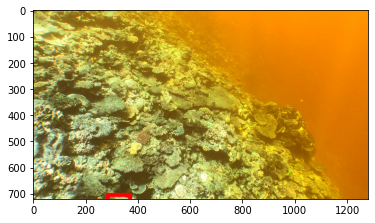

In [9]:

r = train[train["image_id"]=="0-9470"]["labels_array"].item()[0]
window_name = 'Image'

top = (r[0], r[1])
bott = (r[0]+(r[2]), r[1]+(r[3]))

image = cv2.rectangle(
    cv2.imread(train[train["image_id"]=="0-9470"]["path_from_id"].item()),
    top,
    bott,
    (255, 0, 0),
    3
)
# cv2.imshow(window_name, image)
print(r)
plt.imshow(image)